In [62]:
# pip install geopandas matplotlib

In [63]:
import geopandas as gpd

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, pairwise_distances_argmin_min
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

Pidana
https://www.bps.go.id/id/statistics-table/2/MTAxIzI=/jumlah-tindak-pidana-menurut-kepolisian-daerah.html

Pendidikan
https://www.bps.go.id/id/statistics-table/2/MTk4MCMy/tingkat-penyelesaian-pendidikan-menurut-jenjang-pendidikan-dan-provinsi.html

Pengangguran
https://www.bps.go.id/id/statistics-table/2/NTQzIzI=/tingkat-pengangguran-terbuka-menurut-provinsi--persen-.html

Upah rata-rata per jam
https://www.bps.go.id/id/statistics-table/2/MTE3MiMy/upah-rata---rata-per-jam-pekerja-menurut-provinsi--rupiah-jam-.html 

In [65]:
url_pidana='https://drive.google.com/file/d/1-X5EC5lgPwS0hSEfBApD-SFlwYmjWacH/view?usp=drive_link'
url_pidana='https://drive.google.com/uc?id=' + url_pidana.split('/')[-2]

url_pendidikan='https://drive.google.com/file/d/1_neSxkDW_faVBJEWE6C52eEEVjK88lx3/view?usp=drive_link'
url_pendidikan='https://drive.google.com/uc?id=' + url_pendidikan.split('/')[-2]

url_pengangguran='https://drive.google.com/file/d/1K3EdFyG9LwE9Y6kow4ySDl3lME0FfK61/view?usp=drive_link'
url_pengangguran='https://drive.google.com/uc?id=' + url_pengangguran.split('/')[-2]

url_pendapatan='https://drive.google.com/file/d/1SLrnC_nL8BBFRB8wn1r8YUzpvTmMAM_6/view?usp=drive_link'
url_pendapatan='https://drive.google.com/uc?id=' + url_pendapatan.split('/')[-2]

In [66]:
df_pidana = pd.read_csv(url_pidana, delimiter=';')
df_pendidikan = pd.read_csv(url_pendidikan, delimiter=';')
df_pengangguran = pd.read_csv(url_pengangguran, delimiter=';')
df_pendapatan = pd.read_csv(url_pendapatan, delimiter=';')

print(f"Pidana: {df_pidana.shape}")
print(f"Pendidikan: {df_pendidikan.shape}")
print(f"Pengangguran: {df_pengangguran.shape}")
print(f"Pendapatan: {df_pendapatan.shape}")

Pidana: (35, 10)
Pendidikan: (39, 28)
Pengangguran: (39, 19)
Pendapatan: (39, 10)


In [67]:
df_pidana.head(3)

,Provinsi,Pidana_2015,Pidana_2016,Pidana_2017,Pidana_2018,Pidana_2019,Pidana_2020,Pidana_2021,Pidana_2022,Pidana_2023
0,ACEH,8048,9646,8885,8758,7483,7745,6651,10137,12420
1,SUMATERA UTARA,35248,37102,39867,32922,30831,32990,36534,43555,62278
2,SUMATERA BARAT,16277,14921,13205,12953,11064,7992,5666,7691,12722


In [68]:
df_pendidikan.head(3)

,Provinsi,SD_2015,SD_2016,SD_2017,SD_2018,SD_2019,SD_2020,SD_2021,SD_2022,SD_2023,...,SMP_2023,SMA_2015,SMA_2016,SMA_2017,SMA_2018,SMA_2019,SMA_2020,SMA_2021,SMA_2022,SMA_2023
0,ACEH,96.47,98.07,97.85,96.75,98.6,98.33,99.44,99.45,99.08,...,94.55,68.16,74.46,70.64,70.68,69.96,70.07,74.36,70.67,74.46
1,SUMATERA UTARA,92.76,96.61,97.63,95.76,97.12,96.48,98.57,98.74,98.75,...,94.35,59.54,69.69,67.16,68.34,65.21,70.39,72.81,77.16,74.43
2,SUMATERA BARAT,87.85,90.69,92.67,90.54,91.25,93.26,95.29,97.87,95.81,...,90.65,58.04,64.97,60.8,65.34,60.32,67.11,70.06,65.96,68.64


In [69]:
df_pengangguran.head(3)


,Provinsi,2015_Februari,2015_Agustus,2016_Februari,2016_Agustus,2017_Februari,2017_Agustus,2018_Februari,2018_Agustus,2019_Februari,2019_Agustus,2020_Februari,2020_Agustus,2021_Februari,2021_Agustus,2022_Februari,2022_Agustus,2023_Februari,2023_Agustus
0,ACEH,7.73,9.93,8.13,7.57,7.39,6.57,6.54,6.34,5.48,6.17,5.4,6.59,6.3,6.3,5.97,6.17,5.75,6.03
1,SUMATERA UTARA,6.39,6.71,6.49,5.84,6.41,5.6,5.61,5.55,5.57,5.39,4.71,6.91,6.01,6.33,5.47,6.16,5.24,5.89
2,SUMATERA BARAT,5.99,6.89,5.81,5.09,5.8,5.58,5.68,5.66,5.38,5.38,5.25,6.88,6.67,6.52,6.17,6.28,5.9,5.94


In [70]:
df_pendapatan.head(3)

,Provinsi,Mean_Upah_Per_Jam_2015,Mean_Upah_Per_Jam_2016,Mean_Upah_Per_Jam_2017,Mean_Upah_Per_Jam_2018,Mean_Upah_Per_Jam_2019,Mean_Upah_Per_Jam_2020,Mean_Upah_Per_Jam_2021,Mean_Upah_Per_Jam_2022,Mean_Upah_Per_Jam_2023
0,ACEH,11226,13627,14809,13814,15065,18099,17037,16772,17585
1,SUMATERA UTARA,10618,11646,13396,13257,14061,15949,15486,15131,17609
2,SUMATERA BARAT,11241,13206,14378,14431,15210,17571,16630,15887,16694


## Pre-Processing

1. Drop provinsi yang terlalu banyak memiliki missing values
2. Handle missing values -> diubah jadi rata-rata by row karena setiap row mewakilkan provinsi
3. Convert data ke type numeric

In [89]:
provinsi_to_drop = ["INDONESIA", "PAPUA SELATAN", "PAPUA BARAT DAYA", "PAPUA TENGAH", "PAPUA PEGUNUNGAN"]

df_pidana.drop(index=df_pidana[df_pidana["Provinsi"].isin(['INDONESIA'])].index, inplace=True)
df_pendidikan.drop(index=df_pendidikan[df_pendidikan["Provinsi"].isin(provinsi_to_drop)].index, inplace=True)
df_pengangguran.drop(index=df_pengangguran[df_pengangguran["Provinsi"].isin(provinsi_to_drop)].index, inplace=True)
df_pendapatan.drop(index=df_pendapatan[df_pendapatan["Provinsi"].isin(provinsi_to_drop)].index, inplace=True)

df_pidana = df_pidana.replace('-', np.nan)
print(df_pidana.isnull().sum())

for index, row in df_pidana.iterrows():
    if row.isnull().any():
        mean_row = row.iloc[1:].astype(float).mean()
        df_pidana.loc[index] = row.fillna(mean_row)

for col in df_pidana.columns[1:]:
    df_pidana[col] = pd.to_numeric(df_pidana[col])

for col in df_pendidikan.columns[1:]:
    df_pendidikan[col] = pd.to_numeric(df_pendidikan[col])

for col in df_pengangguran.columns[1:]:
    df_pengangguran[col] = pd.to_numeric(df_pengangguran[col])

for col in df_pendapatan.columns[1:]:
    df_pendapatan[col] = pd.to_numeric(df_pendapatan[col])

Provinsi        0
Pidana_2015     0
Pidana_2016     0
Pidana_2017     0
Pidana_2018     0
Pidana_2019     0
Pidana_2020     0
Pidana_2021     0
Pidana_2022     0
Pidana_2023     0
avg_pidana      0
trend_pidana    0
std_pidana      0
dtype: int64


## Feature Engineering

1. Basic Features: Rata-rata attribute dari setiap tahun 2015-2023
2. Advanced Features: 
   - Trends (slope) sepanjang beberapa tahun 2015-2023
   - Variability (standard deviation)

In [72]:
# 1. Pidana
pidana_cols = [col for col in df_pidana.columns if col != 'Provinsi']
df_pidana['avg_pidana'] = df_pidana[pidana_cols].mean(axis=1)

years = list(range(len(pidana_cols)))
df_pidana['trend_pidana'] = 0.0

for idx, row in df_pidana.iterrows():
    y = row[pidana_cols].values.astype(float)
    if len(y) > 1:
        m, b = np.polyfit(years, y, 1)
        df_pidana.loc[idx, 'trend_pidana'] = m

df_pidana['std_pidana'] = df_pidana[pidana_cols].std(axis=1)

df_pidana_agg = df_pidana[['Provinsi', 'avg_pidana', 'trend_pidana', 'std_pidana']]

In [73]:
# 2. Pendidikan
pendidikan_cols = [col for col in df_pendidikan.columns if col != 'Provinsi']
df_pendidikan['avg_pendidikan'] = df_pendidikan[pendidikan_cols].mean(axis=1)

years = list(range(len(pendidikan_cols)))
df_pendidikan['trend_pendidikan'] = 0.0

for idx, row in df_pendidikan.iterrows():
    y = row[pendidikan_cols].values.astype(float)
    if len(y) > 1:
        m, b = np.polyfit(years, y, 1)
        df_pendidikan.loc[idx, 'trend_pendidikan'] = m

df_pendidikan['std_pendidikan'] = df_pendidikan[pendidikan_cols].std(axis=1)

df_pendidikan_agg = df_pendidikan[['Provinsi', 'avg_pendidikan', 'trend_pendidikan', 'std_pendidikan']]

In [74]:
# 3. Pengangguran
unemployment_by_year = {}
for year in range(2015, 2024):
    feb_col = f"{year}_Februari"
    ags_col = f"{year}_Agustus"
    if feb_col in df_pengangguran.columns and ags_col in df_pengangguran.columns:
        year_avg = (df_pengangguran[feb_col] + df_pengangguran[ags_col]) / 2
        unemployment_by_year[year] = year_avg

years = sorted(unemployment_by_year.keys())
df_pengangguran_yearly = pd.DataFrame()
df_pengangguran_yearly['Provinsi'] = df_pengangguran['Provinsi']

for year in years:
    df_pengangguran_yearly[str(year)] = unemployment_by_year[year]

df_pengangguran['avg_pengangguran'] = df_pengangguran_yearly.iloc[:, 1:].mean(axis=1)

trend_cols = [str(year) for year in years]
years_numeric = list(range(len(trend_cols)))
df_pengangguran['trend_pengangguran'] = 0.0

for idx, row in df_pengangguran_yearly.iterrows():
    y = row[trend_cols].values.astype(float)
    if len(y) > 1:
        m, b = np.polyfit(years_numeric, y, 1)
        df_pengangguran.loc[idx, 'trend_pengangguran'] = m

df_pengangguran['std_pengangguran'] = df_pengangguran_yearly.iloc[:, 1:].std(axis=1)

df_pengangguran_agg = df_pengangguran[['Provinsi', 'avg_pengangguran', 'trend_pengangguran', 'std_pengangguran']]

In [75]:
# 4. Pendapatan
income_cols = [col for col in df_pendapatan.columns if col != 'Provinsi']
df_pendapatan['avg_pendapatan'] = df_pendapatan[income_cols].mean(axis=1)

years = list(range(len(income_cols)))
df_pendapatan['trend_pendapatan'] = 0.0

for idx, row in df_pendapatan.iterrows():
    y = row[income_cols].values.astype(float)
    if len(y) > 1:
        m, b = np.polyfit(years, y, 1)
        df_pendapatan.loc[idx, 'trend_pendapatan'] = m

df_pendapatan['std_pendapatan'] = df_pendapatan[income_cols].std(axis=1)

df_pendapatan_agg = df_pendapatan[['Provinsi', 'avg_pendapatan', 'trend_pendapatan', 'std_pendapatan']]

In [76]:
df_agg = pd.merge(df_pidana_agg, df_pendidikan_agg, on='Provinsi')
df_agg = pd.merge(df_agg, df_pengangguran_agg, on='Provinsi')
df_agg = pd.merge(df_agg, df_pendapatan_agg, on='Provinsi')

df_agg.head(3)

,Provinsi,avg_pidana,trend_pidana,std_pidana,avg_pendidikan,trend_pendidikan,std_pendidikan,avg_pengangguran,trend_pengangguran,std_pengangguran,avg_pendapatan,trend_pendapatan,std_pendapatan
0,ACEH,8863.666667,224.666667,1717.971624,86.955926,-1.260366,11.760765,6.686667,-0.315083,1.029530,15337.111111,726.866667,2239.645365
1,SUMATERA UTARA,39036.333333,2014.683333,9532.240857,85.225556,-1.235317,12.414486,5.904444,-0.073833,0.350504,14128.111111,754.850000,2181.254023
2,SUMATERA BARAT,11387.888889,-932.483333,3570.041402,80.800000,-1.264414,12.664681,5.937222,0.040833,0.427976,15027.555556,624.983333,1969.129701


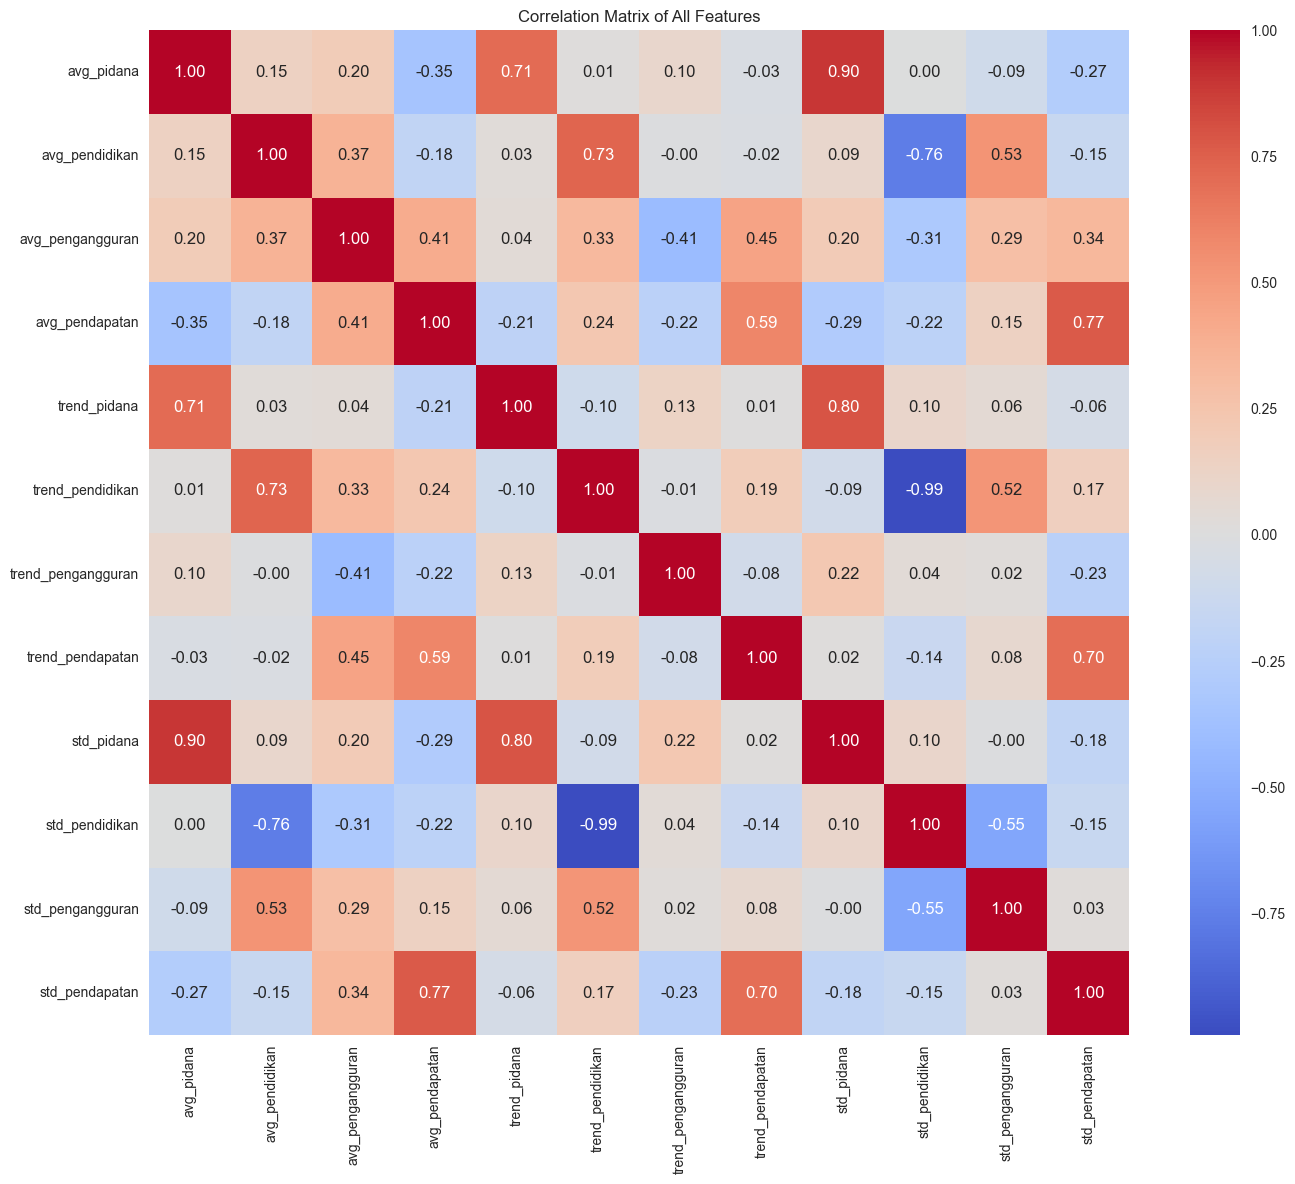

In [77]:
basic_features = ['avg_pidana', 'avg_pendidikan', 'avg_pengangguran', 'avg_pendapatan']
trend_features = ['trend_pidana', 'trend_pendidikan', 'trend_pengangguran', 'trend_pendapatan']
std_features = ['std_pidana', 'std_pendidikan', 'std_pengangguran', 'std_pendapatan']

all_features = basic_features + trend_features + std_features

plt.figure(figsize=(14, 12))
sns.heatmap(df_agg[all_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()

## Scaling

In [78]:
robust_scaler = RobustScaler()
df_robust_scaled = robust_scaler.fit_transform(df_agg[all_features])
df_robust_scaled = pd.DataFrame(df_robust_scaled, columns=all_features)

In [79]:
df_robust_scaled.head(5)

,avg_pidana,avg_pendidikan,avg_pengangguran,avg_pendapatan,trend_pidana,trend_pendidikan,trend_pengangguran,trend_pendapatan,std_pidana,std_pendidikan,std_pengangguran,std_pendapatan
0,0.368481,1.178794,0.901293,-0.190929,0.143272,0.635361,-2.163842,0.165147,-0.203808,-0.706585,1.900949,0.030618
1,5.921960,0.847447,0.570388,-0.506082,3.461702,0.691419,-0.346516,0.327967,3.776833,-0.566385,-0.647083,-0.039431
2,0.833081,0.000000,0.584254,-0.271621,-2.001916,0.626303,0.517263,-0.427657,0.739649,-0.512727,-0.356371,-0.293905
3,0.427768,0.102057,0.432667,0.169206,0.918461,0.256391,-2.525424,-0.134503,0.471112,-0.268252,1.863094,-0.250231
4,0.043478,-0.020709,-0.148296,-0.299629,-1.446933,-0.129753,1.242310,-0.916893,0.121186,0.056282,0.000000,-0.806199


In [91]:
df_pendapatan

,Provinsi,Mean_Upah_Per_Jam_2015,Mean_Upah_Per_Jam_2016,Mean_Upah_Per_Jam_2017,Mean_Upah_Per_Jam_2018,Mean_Upah_Per_Jam_2019,Mean_Upah_Per_Jam_2020,Mean_Upah_Per_Jam_2021,Mean_Upah_Per_Jam_2022,Mean_Upah_Per_Jam_2023,avg_pendapatan,trend_pendapatan,std_pendapatan
0,ACEH,11226,13627,14809,13814,15065,18099,17037,16772,17585,15337.111111,726.866667,2239.645365
1,SUMATERA UTARA,10618,11646,13396,13257,14061,15949,15486,15131,17609,14128.111111,754.850000,2181.254023
2,SUMATERA BARAT,11241,13206,14378,14431,15210,17571,16630,15887,16694,15027.555556,624.983333,1969.129701
3,RIAU,13303,15506,15182,15613,16270,18411,19144,18626,18413,16718.666667,675.366667,2005.536213
4,JAMBI,12954,13169,14326,14007,14304,15840,16043,16042,17596,14920.111111,540.900000,1542.093013
5,SUMATERA SELATAN,11622,12523,12690,13214,13580,15072,15873,15978,16273,14091.666667,619.883333,1732.318172
6,BENGKULU,12491,13471,14011,14353,14511,17407,18271,16501,17410,15380.666667,672.333333,2046.912309
7,LAMPUNG,10104,10385,11234,11779,12575,14912,15224,13218,13958,12598.777778,583.800000,1875.288563
8,KEP. BANGKA BELITUNG,12660,14257,14822,15818,17373,15763,17692,18132,20141,16295.333333,787.233333,2272.854153
9,KEP. RIAU,18863,21019,19832,23212,22912,25032,25736,23528,27640,23086.000000,937.716667,2839.114783


## Principal Component Analysis (PCA)

In [80]:
n_components = 3

pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_robust_scaled)

## Cluster Analysis with Different Algorithms

Implementasi 5 metode clustering:
1. K-means Clustering
2. DBSCAN (Density-Based Spatial Clustering)
3. Gaussian Mixture Model (GMM)
4. Spectral Clustering
5. Hierarchical Clustering


Finding optimal K using PCA-transformed data:


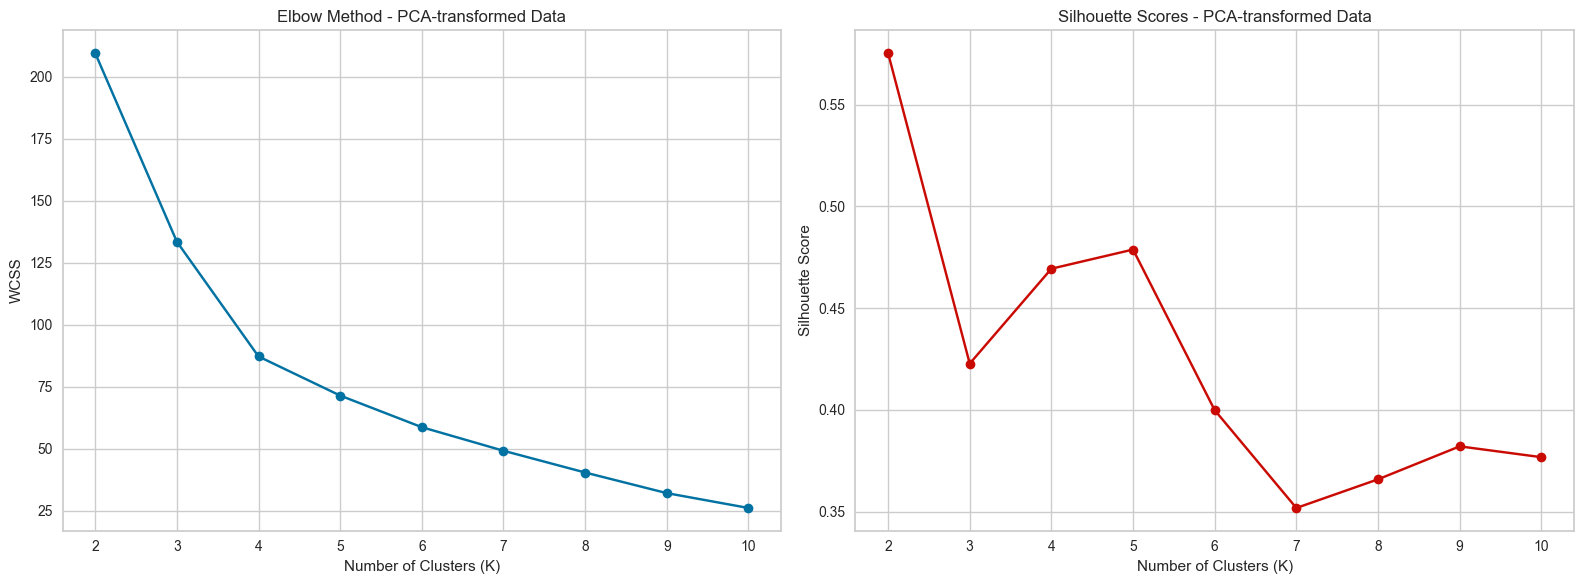

K=2  ->  WCSS: 209.59, Silhouette Score: 0.5753
K=3  ->  WCSS: 133.51, Silhouette Score: 0.4228
K=4  ->  WCSS: 87.21, Silhouette Score: 0.4694
K=5  ->  WCSS: 71.44, Silhouette Score: 0.4788
K=6  ->  WCSS: 58.68, Silhouette Score: 0.3999
K=7  ->  WCSS: 49.17, Silhouette Score: 0.3518
K=8  ->  WCSS: 40.40, Silhouette Score: 0.3659
K=9  ->  WCSS: 32.08, Silhouette Score: 0.3821
K=10  ->  WCSS: 26.09, Silhouette Score: 0.3768
Optimal K based on silhouette score: 2


In [81]:
def find_optimal_k(data, k_range=range(2, 11), title=""):
    wcss = []
    silhouette_scores = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(data, labels))
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    axes[0].plot(k_range, wcss, 'bo-')
    axes[0].set_title(f'Elbow Method - {title}')
    axes[0].set_xlabel('Number of Clusters (K)')
    axes[0].set_ylabel('WCSS')
    axes[0].grid(True)
    
    axes[1].plot(k_range, silhouette_scores, 'ro-')
    axes[1].set_title(f'Silhouette Scores - {title}')
    axes[1].set_xlabel('Number of Clusters (K)')
    axes[1].set_ylabel('Silhouette Score')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    for i, k in enumerate(k_range):
        print(f"K={k}  ->  WCSS: {wcss[i]:.2f}, Silhouette Score: {silhouette_scores[i]:.4f}")
    
    optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
    print(f"Optimal K based on silhouette score: {optimal_k}")
    
    return optimal_k, wcss, silhouette_scores

print("\nFinding optimal K using PCA-transformed data:")
optimal_k_pca, _, _ = find_optimal_k(df_pca, title="PCA-transformed Data")
optimal_k_pca = 3

In [82]:
def visualize_clusters(data, labels, method_name):
    if data.shape[1] > 2:
        plot_data = data[:, :2]
    else:
        plot_data = data
    
    plt.figure(figsize=(12, 10))
    
    unique_labels = np.unique(labels)
    num_clusters = len([l for l in unique_labels if l >= 0])
    
    colors = plt.cm.viridis(np.linspace(0, 1, max(3, num_clusters)))
    
    for i, cluster in enumerate(unique_labels):
        if cluster == -1:
            cluster_color = 'grey'
            marker = 'x'
            label = 'Noise'
        else:
            cluster_color = colors[i % len(colors)]
            marker = 'o'
            label = f'Cluster {cluster+1}'
        
        cluster_points = plot_data[labels == cluster]
        
        plt.scatter(
            cluster_points[:, 0], 
            cluster_points[:, 1], 
            s=100, 
            c=[cluster_color], 
            marker=marker,
            label=label, 
            alpha=0.7
        )
    
    provinces = df_agg['Provinsi'].values
    for i, (x, y) in enumerate(plot_data):
        plt.annotate(
            provinces[i], 
            (x, y),
            fontsize=9, 
            alpha=0.8
        )
    
    plt.title(f'{method_name} Cluster Visualization')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [83]:
def interpret_clusters(data, labels, method_name):
    provinces = df_agg['Provinsi'].values
    
    basic_features = ['avg_pidana', 'avg_pendidikan', 'avg_pengangguran', 'avg_pendapatan']
    trend_features = ['trend_pidana', 'trend_pendidikan', 'trend_pengangguran', 'trend_pendapatan']
    
    overall_means = {}
    for feature in basic_features + trend_features:
        overall_means[feature] = df_agg[feature].mean()
    
    print(f"\n{method_name} Cluster Interpretations:")
    
    unique_clusters = [c for c in sorted(np.unique(labels)) if c >= 0]
    
    for cluster in unique_clusters:
        cluster_indices = np.where(labels == cluster)[0]
        cluster_provinces = provinces[cluster_indices]
        
        print(f"\nCluster {cluster+1} ({len(cluster_provinces)} provinces):")
        print(f"Provinces: {', '.join(cluster_provinces)}")
        
        cluster_data = df_agg.iloc[cluster_indices]
        
        characteristics = []
        
        crime_level = "tinggi" if cluster_data['avg_pidana'].mean() > overall_means['avg_pidana'] else "rendah"
        crime_trend = "meningkat" if cluster_data['trend_pidana'].mean() > 0 else "menurun"
        characteristics.append(f"Tingkat kriminalitas {crime_level} dengan tren {crime_trend}")
        
        education_level = "tinggi" if cluster_data['avg_pendidikan'].mean() > overall_means['avg_pendidikan'] else "rendah"
        education_trend = "meningkat" if cluster_data['trend_pendidikan'].mean() > 0 else "menurun"
        characteristics.append(f"Tingkat pendidikan {education_level} dengan tren {education_trend}")
        
        unemployment_level = "tinggi" if cluster_data['avg_pengangguran'].mean() > overall_means['avg_pengangguran'] else "rendah"
        unemployment_trend = "meningkat" if cluster_data['trend_pengangguran'].mean() > 0 else "menurun"
        characteristics.append(f"Tingkat pengangguran {unemployment_level} dengan tren {unemployment_trend}")
        
        income_level = "tinggi" if cluster_data['avg_pendapatan'].mean() > overall_means['avg_pendapatan'] else "rendah"
        income_trend = "meningkat" if cluster_data['trend_pendapatan'].mean() > 0 else "menurun"
        characteristics.append(f"Tingkat pendapatan {income_level} dengan tren {income_trend}")
        
        cluster_name = ""
        if income_level == "tinggi" and education_level == "tinggi":
            cluster_name = "Wilayah Berkembang Maju"
        elif income_level == "tinggi" and education_level == "rendah":
            cluster_name = "Wilayah Ekonomi Berbasis Sumber Daya"
        elif crime_level == "rendah" and unemployment_level == "rendah":
            cluster_name = "Wilayah Tradisional Stabil"
        elif unemployment_level == "tinggi" and crime_level == "tinggi":
            cluster_name = "Wilayah dengan Tantangan Sosial"
        else:
            cluster_name = "Wilayah Transisi"
            
        print(f"Karakteristik: {cluster_name}")
        for char in characteristics:
            print(f"- {char}")
        
        print("Nilai rata-rata:")
        for feature in basic_features:
            feature_mean = cluster_data[feature].mean()
            feature_diff = ((feature_mean - overall_means[feature]) / overall_means[feature]) * 100
            print(f"- {feature}: {feature_mean:.2f} ({feature_diff:+.1f}% dari rata-rata)")
    
    if -1 in labels:
        noise_indices = np.where(labels == -1)[0]
        noise_provinces = provinces[noise_indices]
        print(f"\nNoise Points ({len(noise_provinces)} provinces):")
        print(f"Provinces: {', '.join(noise_provinces)}")
        print("Karakteristik: Wilayah dengan pola unik yang tidak terklasifikasi dalam cluster manapun")

In [84]:
def evaluate_clustering(data, labels, method_name):
    if -1 in labels:
        valid_indices = labels != -1
        if sum(valid_indices) < 2:
            print(f"\n{method_name} Metrics:")
            print("Could not calculate metrics - insufficient non-noise points.")
            return
        filtered_data = data[valid_indices]
        filtered_labels = labels[valid_indices]
    else:
        filtered_data = data
        filtered_labels = labels
        
    if len(np.unique(filtered_labels)) < 2:
        print(f"\n{method_name} Metrics:")
        print("Could not calculate metrics - need at least 2 clusters.")
        return
        
    try:
        silhouette = silhouette_score(filtered_data, filtered_labels)
        ch_score = calinski_harabasz_score(filtered_data, filtered_labels)
        
        print(f"\n{method_name} Metrics:")
        print(f"Silhouette Score: {silhouette:.4f}")
        print(f"Calinski-Harabasz Index: {ch_score:.2f}")
        print(f"Number of clusters: {len(np.unique(filtered_labels))}")
        
        unique, counts = np.unique(filtered_labels, return_counts=True)
        for cluster, count in zip(unique, counts):
            print(f"Cluster {cluster+1}: {count} provinces")
        
        if -1 in labels:
            noise_count = sum(labels == -1)
            print(f"Noise points: {noise_count} provinces")
            
        interpret_clusters(data, labels, method_name)
            
    except Exception as e:
        print(f"Error calculating metrics: {e}")

K-Means

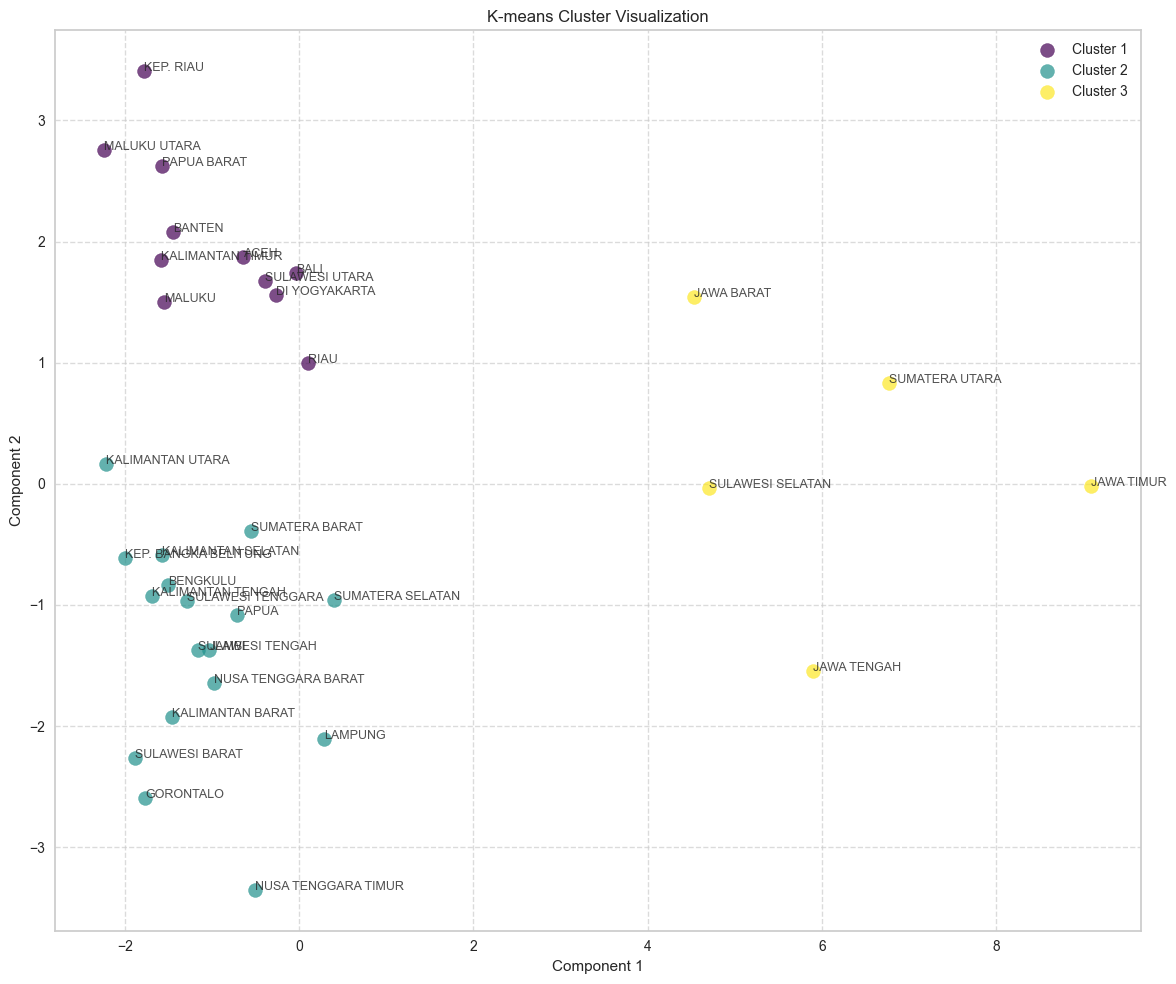


K-means Metrics:
Silhouette Score: 0.4228
Calinski-Harabasz Index: 34.13
Number of clusters: 3
Cluster 1: 11 provinces
Cluster 2: 17 provinces
Cluster 3: 5 provinces

K-means Cluster Interpretations:

Cluster 1 (11 provinces):
Provinces: ACEH, RIAU, KEP. RIAU, DI YOGYAKARTA, BANTEN, BALI, KALIMANTAN TIMUR, SULAWESI UTARA, MALUKU, MALUKU UTARA, PAPUA BARAT
Karakteristik: Wilayah Berkembang Maju
- Tingkat kriminalitas rendah dengan tren meningkat
- Tingkat pendidikan tinggi dengan tren menurun
- Tingkat pengangguran tinggi dengan tren menurun
- Tingkat pendapatan tinggi dengan tren meningkat
Nilai rata-rata:
- avg_pidana: 5688.61 (-37.3% dari rata-rata)
- avg_pendidikan: 84.64 (+5.9% dari rata-rata)
- avg_pengangguran: 6.06 (+22.0% dari rata-rata)
- avg_pendapatan: 18651.13 (+11.9% dari rata-rata)

Cluster 2 (17 provinces):
Provinces: SUMATERA BARAT, JAMBI, SUMATERA SELATAN, BENGKULU, LAMPUNG, KEP. BANGKA BELITUNG, NUSA TENGGARA BARAT, NUSA TENGGARA TIMUR, KALIMANTAN BARAT, KALIMANTAN T

In [85]:
kmeans = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_pca)

df_agg['kmeans_cluster'] = kmeans_labels + 1

visualize_clusters(df_pca, kmeans_labels, "K-means")

evaluate_clustering(df_pca, kmeans_labels, "K-means")

In [88]:
gdf = gpd.read_file("indonesia.geojson")
df_agg['kmeans_cluster'] = kmeans_labels + 1

# Standarkan format huruf kecil dan hapus spasi
gdf["state"] = gdf["state"].str.lower().str.strip()
df_agg["Provinsi"] = df_agg["Provinsi"].str.lower().str.strip()

# Merge berdasarkan nama provinsi
gdf_merged = gdf.merge(df_agg, how="left", left_on="state", right_on="Provinsi")
gdf_merged = gdf_merged.dropna()
resultTable = pd.DataFrame({'Provinsi':gdf_merged['Provinsi'], 'Cluster':gdf_merged['kmeans_cluster']})
resultTable = resultTable.dropna()
print(resultTable)


# fig, ax = plt.subplots(figsize=(12, 10))
# gdf_merged.plot(
#     column='kmeans_cluster', 
#     cmap='Set2', 
#     linewidth=0.8, 
#     edgecolor='black', 
#     legend=True, 
#     ax=ax
# )

# ax.set_title("Peta Klaster Provinsi Berdasarkan Faktor Sosial Ekonomi (KMeans)")
# ax.axis('off')
# plt.show()

import plotly.express as px

fig = px.choropleth(
    gdf_merged,
    geojson=gdf_merged.geometry,
    locations=gdf_merged.index,
    color="kmeans_cluster",
    hover_name="state",
    hover_data=["kmeans_cluster"],
    projection="mercator",
    width=1500,   # Lebar dalam pixel
    height=700   # Tinggi dalam pixel
)

fig.update_geos(
    fitbounds="locations",
    visible=False,
    projection_scale=1,
    projection_rotation=dict(lon=115, lat=-2),
    lataxis=dict(range=[-11, 7]),
    lonaxis=dict(range=[95, 141])
)
fig.update_layout(title="Klaster Provinsi Indonesia", margin={"r":0,"t":30,"l":0,"b":0})
fig.show()


               Provinsi  Cluster
0                  aceh      1.0
1        sumatera barat      2.0
3        sumatera utara      3.0
5           papua barat      1.0
6            jawa timur      3.0
7      kalimantan barat      2.0
8    kalimantan selatan      2.0
9      kalimantan timur      1.0
11              lampung      2.0
12               maluku      1.0
13         maluku utara      1.0
14  nusa tenggara barat      2.0
15  nusa tenggara timur      2.0
16                papua      2.0
17                 riau      1.0
18     sulawesi selatan      3.0
19             bengkulu      2.0
20      sulawesi tengah      2.0
21       sulawesi utara      1.0
22    sulawesi tenggara      2.0
23                 bali      1.0
24               banten      1.0
25            gorontalo      2.0
27                jambi      2.0
28           jawa barat      3.0
29          jawa tengah      3.0
30    kalimantan tengah      2.0
31       sulawesi barat      2.0
32     sumatera selatan      2.0
33     kal